<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PROYECTO4/Proyecto4_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p>

<h1><b>Proyecto 4: Clasificación de señales ECG</b></h1>
<h4><b>Bioseñales y sistemas<br>Universidad de Antioquia, Facultad de Ingeniería - Bioingeniería<br>2024-2</b></h4><br>

<h4><b>Grupo:</b> 3</h4>
<h4><b>Integrantes:</b> Mariana Álvarez Yarce - Ana María Seguro Acevedo</h4>

#<b>Contexto del problema</b>

<h4>Las enfermedades cardiovasculares son una de las principales causas de muerte global, con 17,9 millones de muertes en 2019 según la OMS. Su riesgo se incrementa por factores como el tabaquismo, hipertensión, sedentarismo, obesidad, entre otras condiciones.</h4>

<h4>La tecnología, incluyendo sensores en dispositivos de Electrocardiografía (ECG), puede mejorar tratamientos y seguimientos. La medición de parámetros como frecuencia cardíaca y presión arterial es esencial, aunque su variabilidad requiere datos de grandes muestras para construir modelos diagnósticos precisos. El avance respecto a bioseñales implica organizar la cantidad de datos necesaria sobre diversas enfermedades cardiovasculares, mediante un procesado y etiquetado adecuados, con el fin de construir modelos para diagnóstico o predicción. El enfoque de grandes volúmenes de datos permite validar el procesamiento y análisis en diferentes poblaciones y tecnologías, aumentando la pertinencia de las tecnologías desarrolladas.</h4>

<h4>El ECG, que registra la actividad eléctrica del corazón, es fundamental en la detección de problemas cardiovasculares. Se utiliza un sistema de 12 derivaciones, combinando electrodos en extremidades y tórax para obtener una visión integral de la función cardíaca, con amplitudes de señal de 10 µV a 4 mV y frecuencias relevantes de 0,05 a 100 Hz <b>[1]</b>.</h4>

#<b>Origen de los datos</b>

<h4>La base de datos para el desarrollo del proyecto se basa en una investigación de ECG, establecida por la Universidad de Chapman y el Hospital del Pueblo de Shaoxing. La investigación tiene por objetivo estudiar las señales biomédicas cardiovasculares a través de extensas simulaciones por computadora. Aborda condiciones como la fibrilación auricular, que impactan significativamente en la salud pública y los costos médicos. La base de datos incluye 10,646 ECG de 12 derivaciones muestreados a 500 Hz, con 11 ritmos comunes y 67 condiciones <b>[2]</b>.</h4>

#<b>Entregable</b>

##<h4><b>1. </b>Del artículo <b>[3]</b> hacer un resumen de la sección extracción de caracteríticas (<i>Features extraction</i>) y discutir desde el artículo u otras referencias cómo se hace cuando desaparecen ciertas formas de ondas en el complejo PQRS debido a alguna enfermedad.</h4>

<b>Feature extraction:</b> Los modelos computacionales con redes neuronales se han empleado exitosamente en la clasificación de diferentes tipos de arritmias, por medio de transformaciones secuenciales de los datos sin procesar a características que se entregan a un clasificador de regresión logística multinomial. Entrenar estos modelos requiere una basta cantidad de datos y tiempo de computación. Por otro lado, es posible extraer características de las señales ECG como magnitudes de picos, duraciones, distancias entre picos y su variabilidad en los componentes principales (ondas P, Q, T y el complejo QRS). Sin embargo, estas características no son suficientes para clasificar con precisión ciertos tipos de arritmias, especialmente aquellas donde los componentes se distorisionan o están ausentes.

En consecuencia surgen retos para la extracción de características como la variabilidad en la morfología de onda y la distorsion causada por diversas condiciones, además de las variaciones en amplitud y frecuencia relacionadas con edad, sexo y raza. Por ello, se realizó un procesamiento preliminar de los datos, implementando un escalado de los valores de la señal para unificar la escala de amplitud entre todos los sujetos.

Para mejorar la extracción de características, el artículo presenta un método que incluye 11 características básicas y 39,830 más exhaustivas, además de incluir la edad y el género debido a su relevancia en los análisis médicos. También se incorporan características como la media y varianza de los intervalos RR, que solo se pueden calcular en el los registros de la derivación II de ECG. Se describe en detalle la medición de la prominencia, altura, y anchura de los picos y valles en las señales de ECG, utilizando una distribución empírica de frecuencias. Esta distribución se basa en una tabla para transformar las características en frecuencias uniformes y poder usarlas en un modelo de clasificación. El grupo de características para la derivación II incluye 900 frecuencias para los picos y valles, 600 para las diferencias de ubicación, y 1800 para las diferencias en las proporciones entre altura, anchura y prominencia. Este enfoque de extracción de características revela completamente la distribución de frecuencias empíricas de las ondas P, Q, R, S y T, y sus segmentos, resultando en una estrategia confiable y robusta para la identificación de ritmos en el ECG, incluso para casos donde desaparecen ondas PQRS debido a ciertas enfermedades.</h4>

##<h4><b>2. </b>Del proyecto pasado hay dos opciones de base de datos, la filtrada por los autores o la filtrada en el proyecto 3. De acuerdo a los resultados del proyecto 3 usar la mejor base de datos y justificar la selección.</h4>
<h4>De la base de datos extraer los registros que correspondan a bradicardia sinusal (<i>SB Sinus Bradycardia</i>) y fibrilación auricular (<i>AFIB Atrial Fibrillation</i>). Esta información está en el archivo <i>Diagnostics.xlsx</i>. De estos registros los análisis para el presente proyecto deben hacerse en la derivación II.</h4>



Se seleccionó la base de datos filtrada por los autores debido a que ofrece señales procesadas de manera profesional y ha sido utilizada en el artículo de referencia <b>[3]</b>. Es casi seguro que el filtrado de la base de datos implementado por los autores contara con un flujo de procesamiento más eficiente y métodos más avanzados, en comparación con los implementados en el Proyecto 3. Además, la aplicación de la transformada wavelet en el proyecto anterior se fundamentó en fuentes bibliográficas independientes de la base de datos empleada, lo que podría haber resultado en una selección subóptima para las características específicas de las señales estudiadas. Esto probablemente afectó la calidad e idoneidad de las señales para el entrenamiento de modelos predictivos significativos.<br><br>

Para fines prácticos de este proyecto, se filtraron los datos de acuerdo a los valores de la columna <i>Rhythm</i> correspondientes a <i>SB</i> o <i>AFIB</i>. Este proceso, junto con la eliminación de las columnas diferentes de la derivación II en los archivos .csv, se realizó a través del código en el siguiente <a href="https://colab.research.google.com/drive/1ccO3RDMkQvqxwUoczbcySHRpEvm_2Gr_?usp=sharing" target="_blank">enlace</a>.

Posteriormente, se hizo un lista de todos los registros, tanto para SB como para AFIB, para acceder a los datos a través de rutas cuando se requiera. Esto es más manejable y no consume tantos recursos computacionales cada vez que se ejecuta el código.

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, fft, stats

ruta_SB = '/content/drive/MyDrive/ECGDataDenoised/SB/'
lista_archivos_SB = glob.glob(ruta_SB + '*.csv')
ruta_AFIB = '/content/drive/MyDrive/ECGDataDenoised/AFIB/'
lista_archivos_AFIB = glob.glob(ruta_AFIB + '*.csv')
print(f'\nCantidad archivos = {len(lista_archivos_SB) + len(lista_archivos_AFIB)}')


Cantidad archivos = 5669


In [ ]:
!pip install neurokit2

In [ ]:
from scipy.signal import detrend
def pre_process(signal):
  signal = np.array(signal)
  signal_detrended = detrend(signal)
  x_min = np.min(signal_detrended)
  x_max = np.max(signal_detrended)
  signal_normalized = (signal_detrended - x_min) / (x_max - x_min)

  return signal_normalized

In [ ]:
def frecuencia_max_potencia_welch(signal_data, fs):
    freqs, potencia = signal.welch(signal_data, fs, nperseg=1024)
    idx_max = np.argmax(potencia)
    freq_max = freqs[idx_max]
    pot_max = potencia[idx_max]

    return freq_max, pot_max, freqs, potencia

##<h4><b>3. </b>Hacer un minitutorial del uso de la herramienta <i>NeuroKit</i> orientado al análisis de señales ECG.</h4>

En el siguiente <a href="https://colab.research.google.com/drive/1SpqfKQ0kLXfAtIgpbfs_bFb5r2YKGbbP?usp=sharing" target="_blank">enlace</a> se presenta el tutorial de la herramienta de Neurokit. Se desarrolló en un notebook separado para evitar extender la longitud y peso del notebook principal del proyecto.

##<h4><b>4. </b>Escoger diferentes señales de la base de datos del punto 2 y aplicar el tutorial del punto 3.</h4>

In [ ]:
import neurokit2 as nk
import os


##<h4><b>5. </b>Con las características que extrae el neurokit y las discutidas en el punto 1, generar un conjunto de características para el presente trabajo. Incluir la característica de frecuencia de potencia máxima del Proyecto 3. No incluir más de 15 características ni menos de 5 y justificar la selección.</h4>

nota= no es necesario correr este procesamiento, el dataframe final quedó guardado en '/content/drive/MyDrive/ECGDataDenoised/df_ecg_metrics2.csv'

In [ ]:


ruta_SB = '/content/drive/MyDrive/ECGDataDenoised/SB/'
lista_archivos_SB = glob.glob(ruta_SB + '*.csv')[:1780]

ruta_AFIB = '/content/drive/MyDrive/ECGDataDenoised/AFIB/'
lista_archivos_AFIB = glob.glob(ruta_AFIB + '*.csv')[:1780]

data_ecg_metrics = []


def procesar_ecg(filepath):
    try:
        datos = pd.read_csv(filepath, header=None, names=['ECG'])

        signal_ekg = datos['ECG'].values
        signal_ekg = pre_process(signal_ekg)
        signals, info = nk.ecg_process(signal_ekg, sampling_rate=500, method='neurokit')
        freq_max, pot_max, _, _ = frecuencia_max_potencia_welch(signal_ekg, fs=500)


        # Extraer CARACTERISTICAS
        peaks = signals['ECG_R_Peaks']
        rate = signals['ECG_Rate']
        p_peaks = info['ECG_P_Peaks']  # Picos de la onda P
        p_peaks_validos = [p for p in p_peaks if not np.isnan(p)]
        if len(p_peaks_validos) > 1:  # Necesitamos al menos dos picos para calcular intervalos
            p_intervals = np.diff(p_peaks_validos)  # Diferencia entre picos consecutivos
            p_intervals_avg = np.mean(p_intervals)  # Promedio de los intervalos P-P
        else:
            p_intervals_avg = np.nan  # Si no hay suficientes picos, retornamos NaN

        # Calcular métricas de neurokit
        basic_metrics = {
            'filepath': filepath,
            'mean_hr': np.mean(rate),
            'std_hr': np.std(rate),
            'num_beats': np.sum(peaks),
            'intervalo_rr_medio': 60 / np.mean(rate) if np.mean(rate) > 0 else np.nan,
            'num_p_peaks': len(p_peaks_validos),
            'avg_p_interval': p_intervals_avg/500 ,
            'fMP': freq_max

        }



        return basic_metrics

    except Exception as e:
        print(f"Error procesando archivo {filepath}: {e}")
        return None


for archivo in lista_archivos_SB:
    resultado = procesar_ecg(archivo)
    if resultado:

        archivo_relativo = os.path.relpath(archivo, start='/content/drive/MyDrive/ECGDataDenoised/SB/')
        archivo_sin_extension = os.path.splitext(archivo_relativo)[0]
        resultado['filepath'] = archivo_sin_extension
        resultado['patologia'] = 'SB'
        data_ecg_metrics.append(resultado)


for archivo in lista_archivos_AFIB:
    resultado = procesar_ecg(archivo)
    if resultado:
        archivo_relativo = os.path.relpath(archivo, start='/content/drive/MyDrive/ECGDataDenoised/AFIB/')
        archivo_sin_extension = os.path.splitext(archivo_relativo)[0]
        resultado['filepath'] = archivo_sin_extension
        resultado['patologia'] = 'AFIB'
        data_ecg_metrics.append(resultado)


df_ecg_metrics = pd.DataFrame(data_ecg_metrics)




In [ ]:
df_ecg_metrics

,filepath,mean_hr,std_hr,num_beats,intervalo_rr_medio,num_p_peaks,avg_p_interval,fMP,patologia
0,MUSE_20180113_073928_00000,56.930448,1.878494,9,1.053918,9,1.054750,0.976562,SB
1,MUSE_20180114_130415_72000,57.038183,2.888745,9,1.051927,9,1.052000,2.929688,SB
2,MUSE_20180113_073605_76000,49.456334,0.776271,8,1.213191,7,1.210667,0.976562,SB
3,MUSE_20180118_180639_23000,57.526065,2.817997,9,1.043005,9,1.043000,3.417969,SB
4,MUSE_20180113_132904_79000,56.433646,1.147592,9,1.063196,8,1.059714,0.976562,SB
...,...,...,...,...,...,...,...,...,...
3550,MUSE_20180712_155925_33000,119.264774,22.018157,18,0.503082,16,0.545333,3.906250,AFIB
3551,MUSE_20180118_124624_57000,68.099708,5.952689,11,0.881061,11,0.881600,3.417969,AFIB
3552,MUSE_20180118_131302_32000,111.989238,15.167493,18,0.535766,18,0.531765,1.953125,AFIB
3553,MUSE_20180113_125836_16000,78.053042,10.542701,12,0.768708,12,0.767818,10.742188,AFIB


In [ ]:
ruta_data_diag= '/content/drive/MyDrive/ECGDataDenoised/ECG_DIAGNOSTICS.xlsx'
df_diag = pd.read_excel(ruta_data_diag)
df_diag

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180114_075026_69000,AFIB,TWC,80,FEMALE,98,86,74,360,459,69,83,17,215,252,395
2,MUSE_20180113_133901_16000,AFIB,STTC,67,FEMALE,72,65,90,416,455,-1,-15,12,228,273,436
3,MUSE_20180116_123940_90000,AFIB,TWC,81,MALE,79,150,92,404,463,-15,-51,13,218,264,420
4,MUSE_20180114_075003_61000,AFIB,TWC VPB,81,MALE,83,65,92,424,498,68,-46,14,219,265,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,MUSE_20180114_070348_17000,SB,RBBB,62,MALE,55,55,124,440,420,48,28,9,221,283,441
5665,MUSE_20180114_134724_10000,SB,LVHV,56,FEMALE,56,56,88,444,428,49,62,9,219,263,441
5666,MUSE_20180113_122544_20000,SB,NONE,38,FEMALE,56,56,88,434,418,69,54,10,218,262,435
5667,MUSE_20180114_074720_85000,SB,NONE,55,FEMALE,57,57,94,414,402,-4,1,10,212,259,419


In [ ]:
df_ecg_metrics2=df_ecg_metrics.copy()
f_diag = df_diag[['FileName', 'PatientAge', 'Gender', 'VentricularRate', 'AtrialRate']]  # Seleccionar columnas relevantes

# Ahora se realiza un merge entre df_diag y df_ecg_metrics usando 'FileName' y 'filepath'
df_ecg_metrics2 = pd.merge(df_ecg_metrics2, f_diag, left_on='filepath', right_on='FileName', how='left')

df_ecg_metrics2 = df_ecg_metrics2.drop(columns=['FileName'])

# Mostrar el DataFrame final
df_ecg_metrics2

,filepath,mean_hr,std_hr,num_beats,intervalo_rr_medio,num_p_peaks,avg_p_interval,fMP,patologia,PatientAge,Gender,VentricularRate,AtrialRate
0,MUSE_20180113_073928_00000,56.930448,1.878494,9,1.053918,9,1.054750,0.976562,SB,20,MALE,57,57
1,MUSE_20180114_130415_72000,57.038183,2.888745,9,1.051927,9,1.052000,2.929688,SB,36,MALE,57,57
2,MUSE_20180113_073605_76000,49.456334,0.776271,8,1.213191,7,1.210667,0.976562,SB,42,MALE,49,49
3,MUSE_20180118_180639_23000,57.526065,2.817997,9,1.043005,9,1.043000,3.417969,SB,41,FEMALE,57,62
4,MUSE_20180113_132904_79000,56.433646,1.147592,9,1.063196,8,1.059714,0.976562,SB,24,MALE,56,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,MUSE_20180712_155925_33000,119.264774,22.018157,18,0.503082,16,0.545333,3.906250,AFIB,60,MALE,115,85
3551,MUSE_20180118_124624_57000,68.099708,5.952689,11,0.881061,11,0.881600,3.417969,AFIB,69,MALE,67,82
3552,MUSE_20180118_131302_32000,111.989238,15.167493,18,0.535766,18,0.531765,1.953125,AFIB,85,MALE,111,67
3553,MUSE_20180113_125836_16000,78.053042,10.542701,12,0.768708,12,0.767818,10.742188,AFIB,70,MALE,78,227


In [ ]:

ruta_guardado = '/content/drive/MyDrive/ECGDataDenoised/df_ecg_metrics2.csv'

df_ecg_metrics2.to_csv(ruta_guardado, index=False)

##<h4><b>6. </b>Crear una rutina que aplique sobre todos los archivos de la base de datos la rutina 5 y almacene los resultados en un dataframe con las siguientes columnas:</h4>

> * <h4>Registro</h4>
* <h4>Estado</h4>
* <h4>Característica 1</h4>
* <h4>Característica 2</h4><h4>...</h4>
* <h4>Característica N</h4>

##<h4><b>7. </b>Código y análisis de resultados, donde se discutan por los menos tres diferentes arquitecturas de red y las matrices de confusión obtenidas de una red neuronal que permita la clasificación de las dos patologías cardiacas.</h4>

In [ ]:
data_final=pd.read_csv('/content/drive/MyDrive/ECGDataDenoised/df_ecg_metrics2.csv')
data_final.head()

,filepath,mean_hr,std_hr,num_beats,intervalo_rr_medio,num_p_peaks,avg_p_interval,fMP,patologia,PatientAge,Gender,VentricularRate,AtrialRate
0,MUSE_20180113_073928_00000,56.930448,1.878494,9,1.053918,9,1.054750,0.976562,SB,20,MALE,57,57
1,MUSE_20180114_130415_72000,57.038183,2.888745,9,1.051927,9,1.052000,2.929688,SB,36,MALE,57,57
2,MUSE_20180113_073605_76000,49.456334,0.776271,8,1.213191,7,1.210667,0.976562,SB,42,MALE,49,49
3,MUSE_20180118_180639_23000,57.526065,2.817997,9,1.043005,9,1.043000,3.417969,SB,41,FEMALE,57,62
4,MUSE_20180113_132904_79000,56.433646,1.147592,9,1.063196,8,1.059714,0.976562,SB,24,MALE,56,56


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Crear una copia del DataFrame original
df_final = data_final.copy()

df_final['patologia'] = df_final['patologia'].map({'SB': 0, 'AFIB': 1})

df_final['Gender'] = df_final['Gender'].map({'MALE': 0, 'FEMALE': 1})

predictors = list(set(df_final.columns) - {'filepath', 'patologia'})
predictors_numericos = df_final[predictors].select_dtypes(include=['number']).columns

df_final[predictors_numericos] = df_final[predictors_numericos] / df_final[predictors_numericos].max()

df_final.describe()


,mean_hr,std_hr,num_beats,intervalo_rr_medio,num_p_peaks,avg_p_interval,fMP,patologia,PatientAge,Gender,VentricularRate,AtrialRate
count,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3554.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000
mean,0.427879,0.207212,0.421136,0.478598,0.489643,0.306761,0.072199,0.499578,0.672037,0.385935,0.334291,0.179482
std,0.151055,0.200465,0.146211,0.137497,0.124413,0.072129,0.054014,0.500070,0.150020,0.486884,0.124895,0.146370
min,0.184895,0.001264,0.137931,0.184895,0.000000,0.144343,0.009804,0.000000,0.132653,0.000000,0.151111,0.000000
25%,0.313765,0.022538,0.310345,0.353383,0.409091,0.244136,0.039216,0.000000,0.571429,0.000000,0.248889,0.102804
50%,0.350320,0.171925,0.344828,0.527789,0.454545,0.332456,0.068627,0.000000,0.683673,0.000000,0.262222,0.110280
75%,0.523214,0.351579,0.517241,0.589279,0.590909,0.354404,0.078431,1.000000,0.785714,1.000000,0.404444,0.194393
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

df_final_clean = df_final.dropna(subset=predictors_numericos)

print(f"Total pacientes antes: {df_final.shape[0]}")
print(f"Total pacientes después de eliminar NaN: {df_final_clean.shape[0]}")

Total pacientes antes: 3555
Total pacientes después de eliminar NaN: 3554


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

In [ ]:


X = df_final_clean[predictors_numericos].values
y = df_final_clean['patologia'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



=== Resultados para el Modelo 1 (3 capas de 8 neuronas) ===
Entrenamiento:
              precision    recall  f1-score   support

          SB       0.98      0.98      0.98      1245
        AFIB       0.98      0.98      0.98      1242

    accuracy                           0.98      2487
   macro avg       0.98      0.98      0.98      2487
weighted avg       0.98      0.98      0.98      2487


Validación (Prueba):
              precision    recall  f1-score   support

          SB       0.96      0.97      0.97       534
        AFIB       0.97      0.96      0.97       533

    accuracy                           0.97      1067
   macro avg       0.97      0.97      0.97      1067
weighted avg       0.97      0.97      0.97      1067


=== Resultados para el Modelo 2 (2 capas de 16 neuronas) ===
Entrenamiento:
              precision    recall  f1-score   support

          SB       0.98      0.99      0.98      1245
        AFIB       0.99      0.98      0.98      1242

    acc

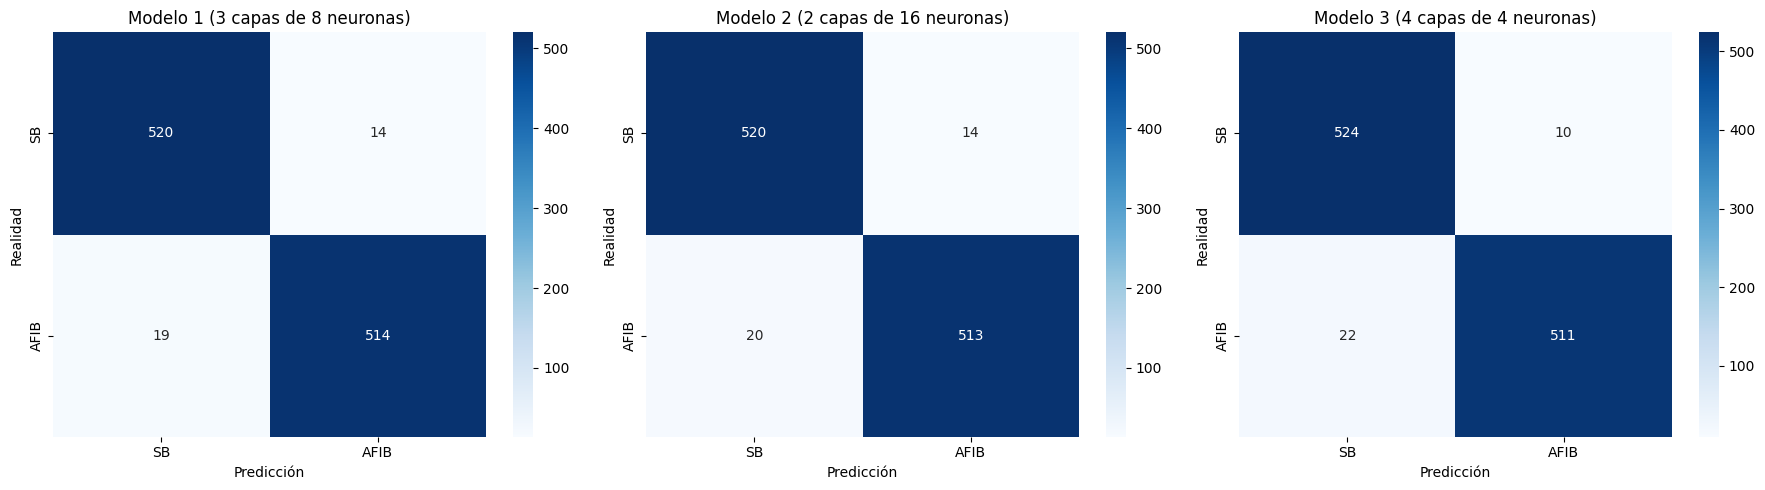

In [ ]:
models = {
    'Modelo 1 (3 capas de 8 neuronas)': MLPClassifier(hidden_layer_sizes=(8, 8, 8), activation='relu', solver='adam', max_iter=1000),
    'Modelo 2 (2 capas de 16 neuronas)': MLPClassifier(hidden_layer_sizes=(16, 16), activation='relu', solver='adam', max_iter=1000),
    'Modelo 3 (4 capas de 4 neuronas)': MLPClassifier(hidden_layer_sizes=(4, 4, 4, 4), activation='relu', solver='adam', max_iter=1000)
}

plt.figure(figsize=(18, 5))
for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)

    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    print(f"\n=== Resultados para el {model_name} ===")
    print("Entrenamiento:")
    print(classification_report(y_train, predict_train, target_names=['SB', 'AFIB']))
    print("\nValidación (Prueba):")
    print(classification_report(y_test, predict_test, target_names=['SB', 'AFIB']))

    cm = confusion_matrix(y_test, predict_test)

    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['SB', 'AFIB'], yticklabels=['SB', 'AFIB'])
    plt.title(f'{model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Realidad')

plt.tight_layout()
plt.show()

##<h4><b>8. </b>Consultar cómo funciona, realizar y discutir un ejemplo con los datos del algoritmo de K means y Máquinas de Soporte Vectorial (SVM).</h4>

##<h4><b>9. </b>Hacer un informe con todos los puntos anteriores. En el informe incluir: Consultar por lo menos tres equipos comerciales que traen ya incorporados algoritmos de ayuda diagnóstica a partir de señales EKG y discutir brevemente las funcionalidades desde la teoría vista en el curso.</h4>

La discusión de resultados se realiza en los numerales anteriores al final de cada sección.

<b><u>Conclusiones</u></b>

* ...



#<b>Referencias</b>


<b>[1]:</b> Biosenales y Sistemas. (3 de Octubre, 2024). Proyecto4 en <i>proyecto</i> [Repositorio de GitHub]. biosenalesysistemas. https://github.com/biosenalesysistemas/proyecto

<b>[2]:</b> Zheng, Jianwei (2019). ChapmanECG. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4560497.v1

<b>[3]:</b> Zheng, J., Chu, H., Struppa, D. et al. Optimal Multi-Stage Arrhythmia Classification Approach. <i>Sci Rep</i> 10, 2898 (2020). https://doi.org/10.1038/s41598-020-59821-7

<b>[4]:</b>M. Malik and A. J. Camm, "Heart rate variability: Analysis of physiological mechanisms," Heart, vol. 85, no. 5, pp. 535–541, May 2001. doi: 10.1136/heart.85.5.535.

<b>[5]:</b>